# Introduction

In [16]:
import numpy as np 
import pandas as pd
# from IPython.display import display
# %matplotlib inline

data = np.array([[12.8, 8.6, 12], [5, 7.7, 6]])
columns = np.array(['Sunday', 'Monday', 'Tuesday'])
index = np.array(['Efrat', 'Liel'])

df = pd.DataFrame(data, index, columns, copy=False)
df

,Sunday,Monday,Tuesday
Efrat,12.8,8.6,12.0
Liel,5.0,7.7,6.0


*Change the cell above so that the cell below would change the number of hours Efrat worked on Sunday to 9.6*

In [17]:
# Change the number of hours Efrat worked on Sunday to 9.6

data[0][0] = 9.6

,Sunday,Monday,Tuesday
Efrat,9.6,8.6,12.0
Liel,5.0,7.7,6.0


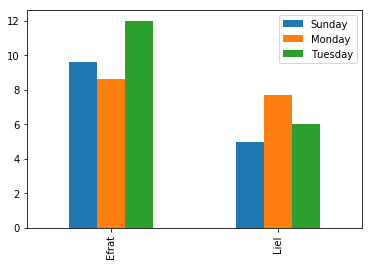

In [18]:
df.plot.bar()
df

## Indexing

In [19]:
# Add a row to df for Wednesday assuming that
# the number of hours  on Wednsday for all the workers
# was the same as on Monday plus half an hour.

df['Wednesday'] = df['Monday'] + 0.5
df

,Sunday,Monday,Tuesday,Wednesday
Efrat,9.6,8.6,12.0,9.1
Liel,5.0,7.7,6.0,8.2


In [20]:
# "Increase" the number of hours that Liel worked on Sunday and Tuesday by 15 minutes

df.loc['Liel'][['Sunday', 'Tuesday']] += 0.25

In [21]:
# Add a row for df for Thursday supposing that Efrat
# worked that day as much as Liel on Wednesday and
# vice versa (Liel worked that day as much as Efrat on Wednesday)

df['Thursday'] = df['Wednesday'].iloc[::-1].copy()
df

,Sunday,Monday,Tuesday,Wednesday,Thursday
Efrat,9.60,8.6,12.00,9.1,9.1
Liel,5.25,7.7,6.25,8.2,8.2


,Sunday,Monday,Tuesday,Wednesday,Thursday
Efrat,9.60,8.6,12.00,9.1,9.1
Liel,5.25,7.7,6.25,8.2,8.2


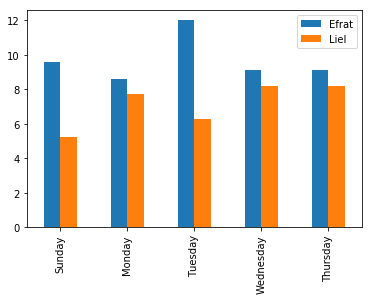

In [22]:
df.transpose().plot.bar()
df

In [23]:
df

,Sunday,Monday,Tuesday,Wednesday,Thursday
Efrat,9.60,8.6,12.00,9.1,9.1
Liel,5.25,7.7,6.25,8.2,8.2


In [24]:
# Indexes can be changed:

# Change index name
df.index.name = 'Name'
display(df)

# Convert the index to a regular column (and add new range index)
df.reset_index(inplace=True)
display(df)

# Change index back to names
df.set_index('Name', inplace=True)
display(df)

# Delete index name
df.index.name = None

# Add new entry to the index
with_moshe = df.reindex(['Efrat', 'Liel', 'Moshe'])
display(with_moshe)

# Set Moshe's values to the mean
with_moshe.fillna(df.mean())

,Sunday,Monday,Tuesday,Wednesday,Thursday
Name,,,,,
Efrat,9.60,8.6,12.00,9.1,9.1
Liel,5.25,7.7,6.25,8.2,8.2


,Name,Sunday,Monday,Tuesday,Wednesday,Thursday
0,Efrat,9.60,8.6,12.00,9.1,9.1
1,Liel,5.25,7.7,6.25,8.2,8.2


,Sunday,Monday,Tuesday,Wednesday,Thursday
Name,,,,,
Efrat,9.60,8.6,12.00,9.1,9.1
Liel,5.25,7.7,6.25,8.2,8.2


,Sunday,Monday,Tuesday,Wednesday,Thursday
Efrat,9.60,8.6,12.00,9.1,9.1
Liel,5.25,7.7,6.25,8.2,8.2
Moshe,NaN,NaN,NaN,NaN,NaN


,Sunday,Monday,Tuesday,Wednesday,Thursday
Efrat,9.600,8.60,12.000,9.10,9.10
Liel,5.250,7.70,6.250,8.20,8.20
Moshe,7.425,8.15,9.125,8.65,8.65


## Aggregations

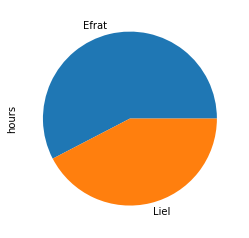

In [25]:
# Plot a pie chart of the total number of hours per employee.

df.sum(axis=1).rename('hours').plot.pie()

In [26]:
# Number of working hours per occupation

occupation_hours = pd.Series({'Teacher': 37.4, 'Programmer': 40,
                              'Lawyer': 54, 'CEO': 58.15},
                              name='hours')
occupation_hours + 10

Teacher       47.40
Programmer    50.00
Lawyer        64.00
CEO           68.15
Name: hours, dtype: float64

In [27]:
occupation_hours.idxmin()

'Teacher'

*Use the hours series to find the most probable occupation of Liel and Efrat.*

In [28]:
def occupation(worker):
    return (occupation_hours - worker).abs().idxmin()

In [29]:
df.sum(axis=1).apply(occupation)

Efrat     Lawyer
Liel     Teacher
dtype: object

## Grouping

In [30]:
# Add some workers to the table

for name in ['Haim', 'Moshe', 'Tal', 'Tali', 'Yoram']:
    df.loc[name] = np.random.uniform(7, 10) + np.random.uniform(0, 2, size=(5,))

In [31]:
# Add an occupation column (using the example before)

df['Occupation'] = df.sum(axis=1).apply(occupation)
df

,Sunday,Monday,Tuesday,Wednesday,Thursday,Occupation
Efrat,9.600000,8.600000,12.000000,9.100000,9.100000,Lawyer
Liel,5.250000,7.700000,6.250000,8.200000,8.200000,Teacher
Haim,8.870243,8.071883,9.715826,9.567113,9.378255,Programmer
Moshe,8.163600,9.626015,8.338714,8.272236,8.812766,Programmer
Tal,8.560878,9.637665,9.060387,10.380310,9.404438,Lawyer
Tali,8.752606,7.755453,9.139045,8.244244,9.684233,Programmer
Yoram,11.326367,10.914422,10.668693,9.869022,11.402540,Lawyer


In [32]:
# Print the name of the worker that spent the most hours per day per occupation

workhours = df.groupby('Occupation')
workhours.idxmax()

,Monday,Sunday,Thursday,Tuesday,Wednesday
Occupation,,,,,
Lawyer,Yoram,Yoram,Yoram,Efrat,Tal
Programmer,Moshe,Haim,Tali,Haim,Haim
Teacher,Liel,Liel,Liel,Liel,Liel


In [33]:
# Show the groupby groups

workhours.groups

{'Lawyer': Index(['Efrat', 'Tal', 'Yoram'], dtype='object'),
 'Programmer': Index(['Haim', 'Moshe', 'Tali'], dtype='object'),
 'Teacher': Index(['Liel'], dtype='object')}

In [34]:
# Show all rows of the group 'Programmer'
workhours.get_group('Programmer')

,Monday,Sunday,Thursday,Tuesday,Wednesday
Haim,8.071883,8.870243,9.378255,9.715826,9.567113
Moshe,9.626015,8.163600,8.812766,8.338714,8.272236
Tali,7.755453,8.752606,9.684233,9.139045,8.244244


In [35]:
# Aggregate the groupby:

dfagg = workhours.agg([np.sum, np.mean, np.max])
dfagg

Sunday                          Monday                       \
                  sum      mean       amax        sum      mean       amax   
Occupation                                                                   
Lawyer      29.487245  9.829082  11.326367  29.152087  9.717362  10.914422   
Programmer  25.786449  8.595483   8.870243  25.453351  8.484450   9.626015   
Teacher      5.250000  5.250000   5.250000   7.700000  7.700000   7.700000   

              Tuesday                        Wednesday                       \
                  sum       mean       amax        sum      mean       amax   
Occupation                                                                    
Lawyer      31.729080  10.576360  12.000000  29.349332  9.783111  10.380310   
Programmer  27.193585   9.064528   9.715826  26.083593  8.694531   9.567113   
Teacher      6.250000   6.250000   6.250000   8.200000  8.200000   8.200000   

             Thursday                       
                  sum      mean       amax  
Occupation                                  
Lawyer      29.906978  9.968993  11.402540  
Programmer  27.875254  9.291751   9.684233  
Teacher      8.200000  8.200000   8.200000

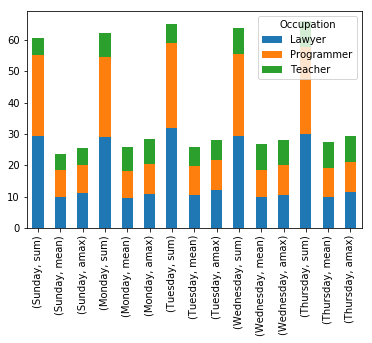

In [36]:
dfagg.transpose().plot.bar(stacked=True)

## MultiIndex

In [37]:
# What is the index of transpose of dfagg?
workhours = dfagg.transpose()
workhours.index

MultiIndex(levels=[['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'], ['sum', 'mean', 'amax']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [38]:
# Selecting a column (Series) keeps the index attached to it.
workhours['Programmer']

Sunday     sum     25.786449
           mean     8.595483
           amax     8.870243
Monday     sum     25.453351
           mean     8.484450
           amax     9.626015
Tuesday    sum     27.193585
           mean     9.064528
           amax     9.715826
Wednesday  sum     26.083593
           mean     8.694531
           amax     9.567113
Thursday   sum     27.875254
           mean     9.291751
           amax     9.684233
Name: Programmer, dtype: float64

In [39]:
# groupby can also work on multi-indexed series
# (name could be also used instead of level=1)

workhours['Programmer'].groupby(level=1).mean()

amax     9.492686
mean     8.826149
sum     26.478446
Name: Programmer, dtype: float64

In [40]:
#
# MultiIndexes can be queried together or one by one
#
workhours.loc[[('Sunday', 'sum'), ('Sunday', 'mean')]]

Occupation      Lawyer  Programmer  Teacher
Sunday sum   29.487245   25.786449     5.25
       mean   9.829082    8.595483     5.25

In [26]:
# Indexes can be renamed

workhours.index.rename(['Weekday', 'Aggregations'], inplace=True)
workhours

Occupation                 Lawyer  Programmer  Teacher
Weekday   Aggregations                                
Sunday    sum           30.152567   25.074323     5.25
          mean          10.050856    8.358108     5.25
          amax          11.241555    8.518436     5.25
Monday    sum           28.301938   26.033943     7.70
          mean           9.433979    8.677981     7.70
          amax          10.711496    8.879370     7.70
Tuesday   sum           32.665680   26.645225     6.25
          mean          10.888560    8.881742     6.25
          amax          12.000000    9.139891     6.25
Wednesday sum           30.247225   25.129761     8.20
          mean          10.082408    8.376587     8.20
          amax          11.379077    9.620265     8.20
Thursday  sum           29.007810   26.038249     8.20
          mean           9.669270    8.679416     8.20
          amax          10.528601    9.562895     8.20

In [27]:
df.index.name = 'Name'
df.head(5)

,Sunday,Monday,Tuesday,Wednesday,Thursday,Occupation
Name,,,,,,
Efrat,9.600000,8.600000,12.000000,9.100000,9.100000,Lawyer
Liel,5.250000,7.700000,6.250000,8.200000,8.200000,Teacher
Haim,9.311012,8.990442,9.848615,9.768149,9.379209,Lawyer
Moshe,11.241555,10.711496,10.817065,11.379077,10.528601,Lawyer
Tal,8.390443,8.879370,8.976997,7.778684,9.037238,Programmer


In [28]:
# And their values can be changed
df.index.values[-1] = 'Yaniv'
df['Sunday'].value_counts()

8.165443     1
9.311012     1
11.241555    1
9.600000     1
8.518436     1
8.390443     1
5.250000     1
Name: Sunday, dtype: int64

In [29]:
# Indexes can be swapped

workhours.swaplevel()

,Occupation,Lawyer,Programmer,Teacher
Aggregations,Weekday,,,
sum,Sunday,30.152567,25.074323,5.25
mean,Sunday,10.050856,8.358108,5.25
amax,Sunday,11.241555,8.518436,5.25
sum,Monday,28.301938,26.033943,7.70
mean,Monday,9.433979,8.677981,7.70
amax,Monday,10.711496,8.879370,7.70
sum,Tuesday,32.665680,26.645225,6.25
mean,Tuesday,10.888560,8.881742,6.25
amax,Tuesday,12.000000,9.139891,6.25


## Interval Indexes

In [30]:
#
# Interval indexes can be used to search in intervals:
#
index = pd.IntervalIndex([pd.Interval(0, 1.5), pd.Interval(0.5, 2.5)])
dfi = pd.DataFrame({'A': [1, 2]}, index=index)
dfi.loc[1]

,A
"(0.0, 1.5]",1
"(0.5, 2.5]",2


*Change the first interval from (0, 1.5] to (2.5, 3] by accessing it through .values. Did it really change?*

In [31]:
dfi.index.values[0] = pd.Interval(2.5, 3)
dfi.index

IntervalIndex([(0.0, 1.5], (0.5, 2.5]]
              closed='right',
              dtype='interval[float64]')

## One-Hot Encoding

In [32]:
cseries = pd.Categorical(list('aaabbbccc'))
cseries

# get_dummies() function can be used to create one-hot encoding
# of categorical data

pd.get_dummies(cseries)

,a,b,c
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1


*Convert "Occupation" to a categorical column in df*

In [33]:
dfc = df.copy()
dfc['Occupation'] = pd.Categorical(df['Occupation'])
dfc

,Sunday,Monday,Tuesday,Wednesday,Thursday,Occupation
Name,,,,,,
Efrat,9.600000,8.600000,12.000000,9.100000,9.100000,Lawyer
Liel,5.250000,7.700000,6.250000,8.200000,8.200000,Teacher
Haim,9.311012,8.990442,9.848615,9.768149,9.379209,Lawyer
Moshe,11.241555,10.711496,10.817065,11.379077,10.528601,Lawyer
Tal,8.390443,8.879370,8.976997,7.778684,9.037238,Programmer
Tali,8.518436,8.530204,8.528337,9.620265,9.562895,Programmer
Yaniv,8.165443,8.624368,9.139891,7.730812,7.438116,Programmer


## Time

In [34]:
rng = pd.date_range('2018-09-01', periods=14, freq='D')
rng

DatetimeIndex(['2018-09-01', '2018-09-02', '2018-09-03', '2018-09-04',
               '2018-09-05', '2018-09-06', '2018-09-07', '2018-09-08',
               '2018-09-09', '2018-09-10', '2018-09-11', '2018-09-12',
               '2018-09-13', '2018-09-14'],
              dtype='datetime64[ns]', freq='D')

In [35]:
# date range can be masked
weekmask = [True, True, True, False, True, True, True]
holidays = ['1700-01-03']

# Business date range (default weekmask excludes weekends)
pd.bdate_range('1700-01-01', '1700-01-08', freq='C',
               weekmask=weekmask, holidays=holidays)

DatetimeIndex(['1700-01-01', '1700-01-02', '1700-01-04', '1700-01-05',
               '1700-01-06', '1700-01-08'],
              dtype='datetime64[ns]', freq='C')

*Create a date range of the first 2 weeks of September 2018 with holidays (2018-09-09 through 2018-09-11) and weekends excluded*

In [36]:
pd.bdate_range(min(rng), max(rng), freq='C', tz='Israel',
               weekmask=[1, 1, 1, 1, 0, 0, 1],
               holidays=['2018-09-09', '2018-09-10', '2018-09-11'])

DatetimeIndex(['2018-09-02 00:00:00+03:00', '2018-09-03 00:00:00+03:00',
               '2018-09-04 00:00:00+03:00', '2018-09-05 00:00:00+03:00',
               '2018-09-06 00:00:00+03:00', '2018-09-12 00:00:00+03:00',
               '2018-09-13 00:00:00+03:00'],
              dtype='datetime64[ns, Israel]', freq='C')

In [37]:
#
# The values in numpy array are of type datetime64
#
str(rng.values.dtype)

'datetime64[ns]'

In [38]:
#
# Create a series indexed by date:
#
ts = pd.Series(range(len(rng)), index=rng)
#display(ts)

#
# Upsample the sequence
#
ts = ts.asfreq('5H', method='pad')
ts

2018-09-01 00:00:00     0
2018-09-01 05:00:00     0
2018-09-01 10:00:00     0
2018-09-01 15:00:00     0
2018-09-01 20:00:00     0
2018-09-02 01:00:00     1
2018-09-02 06:00:00     1
2018-09-02 11:00:00     1
2018-09-02 16:00:00     1
2018-09-02 21:00:00     1
2018-09-03 02:00:00     2
2018-09-03 07:00:00     2
2018-09-03 12:00:00     2
2018-09-03 17:00:00     2
2018-09-03 22:00:00     2
2018-09-04 03:00:00     3
2018-09-04 08:00:00     3
2018-09-04 13:00:00     3
2018-09-04 18:00:00     3
2018-09-04 23:00:00     3
2018-09-05 04:00:00     4
2018-09-05 09:00:00     4
2018-09-05 14:00:00     4
2018-09-05 19:00:00     4
2018-09-06 00:00:00     5
2018-09-06 05:00:00     5
2018-09-06 10:00:00     5
2018-09-06 15:00:00     5
2018-09-06 20:00:00     5
2018-09-07 01:00:00     6
                       ..
2018-09-07 21:00:00     6
2018-09-08 02:00:00     7
2018-09-08 07:00:00     7
2018-09-08 12:00:00     7
2018-09-08 17:00:00     7
2018-09-08 22:00:00     7
2018-09-09 03:00:00     8
2018-09-09 0

*Implement days_to_hours method which converts days to hours resolution of a series by reindexing*

In [ ]:
ts_days = pd.Series(range(len(rng)), index=rng)

def days_to_hours(ts):
    rng = pd.date_range(ts.index.min(), ts.index.max()+pd.Timedelta(1),
                        freq='H')
    return ts.reindex(rng).fillna(method='ffill')
    
days_to_hours(ts_days)

In [ ]:
#
# Downsample the sequence
#
ts = ts.resample('D').min()
ts

*Upsample the sequence again by putting the mean between the previous and the next values for each added row using two different methods:*
* *integer indexing*
* *groupby*

In [ ]:
from datetime import time

r = ts.asfreq('12H')
r.iloc[1::2] = (r.iloc[:-1:2].values + r.iloc[2::2].values) / 2
#print(r, end='\n\n')

f = ts.asfreq('12H')
r = f.groupby(lambda x: x.time)

twelve = r.groups[time(12, 0)]
zero = r.groups[time(0, 0)]

f[twelve] = (f[zero[1:]].values + f[zero[:-1]].values) / 2
#print(f)

p = ts.asfreq('6H')
p.interpolate()
#p.interpolate(inplace=True)

In [ ]:
rng = pd.date_range('2018-09-01', periods=14, freq='D')
ts = pd.Series(range(len(rng)), rng)
f = ts.asfreq('12H')
f.groupby(lambda x: x.time)

In [ ]:
# Dates can be indexed by periods

ts['2018-09']

In [ ]:
# Periods can also be indexes

periods = [pd.Period('2018-08'), pd.Period('2018-09'),
           pd.Period('2018-10')]
ts = pd.Series(range(3), periods)
ts

*Create a series mapping dates (in some format) to the relevant weekday for the past two millenia (assuming Gregorian calendar was always used the way we use it now)*

In [ ]:
from datetime import timedelta, datetime

N_DAYS_IN_2000_YEARS = int(2000 * 365.2422) + 1

now = datetime.now()
dates = [(now - timedelta(i)).date() for i in range(N_DAYS_IN_2000_YEARS)]

index = pd.PeriodIndex(dates, freq='D')
series = pd.Series(index, index)

series = series.dt.strftime('%A')

In [ ]:
series.tail()

In [ ]:
series['0018-09-13']

In [ ]:
series['0018-09-16'] # Should output "Sunday"

## Rolling

In [ ]:
# Calculate rolling window mean for window of size 5

roll = pd.Series(range(100))
roll.rolling(5).mean()

## Merging

In [ ]:
from scipy.sparse import coo_matrix

matrix_1 = coo_matrix(np.ones((2, 2)) * 5)
matrix_2 = coo_matrix(np.ones((2, 2)) * 2)

# Create dataframes from the values of coo_matrix
df_1 = pd.DataFrame({'row': matrix_1.row,
                     'col': matrix_1.col, 'data': matrix_1.data})
df_2 = pd.DataFrame({'row': matrix_2.row, 'col': matrix_2.col, 
                     'data': matrix_2.data})
df_2

In [1405]:
df_2.pivot('row', 'col', 'data')

col,0,1
row,,
0,2.0,2.0
1,2.0,2.0


In [ ]:
df_3 = pd.merge(df_1, df_2, on=['row', 'col'])
df_3

# Pandas

*Calculate matrix multiplication of df_1 and df_2 using pd.merge and groupby*

In [ ]:
# Select multiplied values 
join = pd.merge(df_1, df_2, left_on='col', right_on='row')
join.drop(['col_x', 'row_y'], axis=1, inplace=True)

join['prod'] = join['data_x'] * join['data_y']
join.drop(['data_x', 'data_y'], axis=1, inplace=True)
join = join.groupby(['row_x', 'col_y']).sum()
join

# Integrations

In [ ]:
# Print the availble input sources for dataframes:

[s for s in dir(pd) if s.startswith('read_')]

## Files

In [ ]:
# Save csv file

df.to_csv('workhours.csv')

# Print the contents of a file
with open('workhours.csv') as f:
    print(f.read())
    
# Read back the file to dataframe
pd.read_csv('workhours.csv', index_col='Name')

## Databases

In [ ]:
# Create a database

import sqlite3

db = sqlite3.connect(":memory:")

In [ ]:
#
# Copy the dataframe to the database
#

df.to_sql('hours', db)

In [ ]:
#
# Extract from database
#

pd.read_sql('select * from hours', db, index_col='Name')

## Scikit

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = df.drop('Occupation', axis=1)

X.iloc[:] = MinMaxScaler().fit_transform(X)
X

## PixieDust

In [ ]:
from pixiedust import display

In [ ]:
display(df)

## matplotlib

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

blue, = sns.color_palette("muted", 1)

efrat_hours = df.loc['Efrat'].drop('Occupation')
efrat_hours.plot.hist(color=blue)

## numpy

In [ ]:
# Pandas built on top of numpy. Pandas data is actually
# stored in numpy arrays and for homogeneously-typed
# data it can be manipulated directly from numpy (except pd.Categorical columns))
#
# numpy functions can be executed directly on pandas.Series.

series = pd.Series([8, 9, 100, 0, 67])

np.argsort(series)

In [ ]:
#
# Numpy array values can be manipulated directly
#
print(type(series.values))
series.values.sort()
series